In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
minMax = MinMaxScaler()

In [3]:
sns.set_style(style='darkgrid')

In [4]:
bottomCooker = pd.read_csv('/content/drive/My Drive/ColabDataset/SentimentAndStockStudy/PreProcessDataset/BottomPressureCooker.csv')
gasStove = pd.read_csv("/content/drive/My Drive/ColabDataset/SentimentAndStockStudy/PreProcessDataset/GasStoveReview.csv")
juicerMixer = pd.read_csv("/content/drive/My Drive/ColabDataset/SentimentAndStockStudy/PreProcessDataset/JuicerMixerGrinderReviews.csv")
mixtureGrinder = pd.read_csv("/content/drive/My Drive/ColabDataset/SentimentAndStockStudy/PreProcessDataset/MixtureGrinderReview.csv")
rapidJar = pd.read_csv("/content/drive/My Drive/ColabDataset/SentimentAndStockStudy/PreProcessDataset/RapidJarJuicerMixerGrinderReviews.csv")
tawa = pd.read_csv("/content/drive/My Drive/ColabDataset/SentimentAndStockStudy/PreProcessDataset/TawaReview.csv")

In [5]:
bseData = pd.read_csv("/content/drive/My Drive/ColabDataset/SentimentAndStockStudy/PreProcessDataset/BSE Data - Sheet1.csv")
nseData = pd.read_csv("/content/drive/My Drive/ColabDataset/SentimentAndStockStudy/PreProcessDataset/NSE Data - Sheet1.csv")


bseData.dropna(inplace=True)
nseData.dropna(inplace=True)

bseData['ClosePrice'] = MinMaxScaler().fit_transform(bseData['Close'].values.reshape(-1,1))
nseData['ClosePrice'] = MinMaxScaler().fit_transform(nseData['Close'].values.reshape(-1,1))

In [6]:
bseData['Date'] = pd.to_datetime(bseData['Date'])
nseData['Date'] = pd.to_datetime(bseData['Date'])

bseData.sort_values('Date',inplace=True)
nseData.sort_values('Date',inplace=True)

bseData.rename(columns={"- SPREAD -":"SpreadHighLow","Unnamed: 7":'SpreadOpenClose','Date':'DateOfReview'},inplace=True)
nseData.rename(columns={"- SPREAD -":"SpreadHighLow","Unnamed: 7":'SpreadOpenClose','Date':'DateOfReview'},inplace=True)

In [7]:
allReviews = pd.DataFrame(columns=bottomCooker.iloc[:,6:].columns)
allReviews['DateOfReview'] = bottomCooker['DateOfReview']
allReviews.iloc[0:,0:-1] = bottomCooker.iloc[:,6:]

length = len(allReviews)
allReviews = allReviews.append(gasStove.iloc[:,6:])
allReviews.iloc[length:,-1] = gasStove['DateOfReview']

length = len(allReviews)
allReviews = allReviews.append(juicerMixer.iloc[:,6:])
allReviews.iloc[length:,-1] = juicerMixer['DateOfReview']

length = len(allReviews)
allReviews = allReviews.append(mixtureGrinder.iloc[:,6:])
allReviews.iloc[length:,-1] = mixtureGrinder['DateOfReview']

length = len(allReviews)
allReviews = allReviews.append(rapidJar.iloc[:,6:])
allReviews.iloc[length:,-1] = rapidJar['DateOfReview']

length = len(allReviews)
allReviews = allReviews.append(tawa.iloc[:,6:])
allReviews.iloc[length:,-1] = tawa['DateOfReview']

allReviews.set_index('DateOfReview',inplace=True)
allReviews.index = pd.to_datetime(allReviews.index)
allReviews[['FinalTextSentimentNegative','FinalTextSentimentPositive',
            'FinalTextSentimentNeutral','FinalTextSentimentCompound',
            'UserReviewSentimentNegative','UserReviewSentimentNegative',
            'UserReviewSentimentPositive','UserReviewSentimentNeutral',
            'UserReviewSentimentCompound']] = allReviews[['FinalTextSentimentNegative',
                                                          'FinalTextSentimentPositive',
                                                          'FinalTextSentimentNeutral',
                                                          'FinalTextSentimentCompound',
                                                          'UserReviewSentimentNegative',
                                                          'UserReviewSentimentNegative',
                                                          'UserReviewSentimentPositive',
                                                          'UserReviewSentimentNeutral',
                                                          'UserReviewSentimentCompound']].astype(float) 

In [8]:
monthlyReviews = allReviews[['FinalTextSentimentNegative','FinalTextSentimentPositive',
            'FinalTextSentimentNeutral','FinalTextSentimentCompound',
            'UserReviewSentimentNegative','UserReviewSentimentNegative',
            'UserReviewSentimentPositive','UserReviewSentimentNeutral',
            'UserReviewSentimentCompound']].resample('M').mean().ffill()

In [9]:
quarterlyReviews = allReviews[['FinalTextSentimentNegative','FinalTextSentimentPositive',
            'FinalTextSentimentNeutral','FinalTextSentimentCompound',
            'UserReviewSentimentNegative','UserReviewSentimentNegative',
            'UserReviewSentimentPositive','UserReviewSentimentNeutral',
            'UserReviewSentimentCompound']].resample('M').mean().ffill()

In [10]:
allReviews = allReviews[['FinalTextSentimentNegative','FinalTextSentimentPositive',
            'FinalTextSentimentNeutral','FinalTextSentimentCompound',
            'UserReviewSentimentNegative','UserReviewSentimentNegative',
            'UserReviewSentimentPositive','UserReviewSentimentNeutral',
            'UserReviewSentimentCompound']].resample('D').mean().ffill()

In [11]:
allReviews['DateOfReview'] = allReviews.index
allReviews.reset_index(inplace= True,drop=True)

In [12]:
quarterlyReviews['DateOfReview'] = quarterlyReviews.index
quarterlyReviews.reset_index(inplace= True,drop=True)

In [13]:
monthlyReviews['DateOfReview'] = monthlyReviews.index
monthlyReviews.reset_index(inplace= True,drop=True)

In [59]:
allReviews['FinalTextLabel'] = ['pos' if x>0.5 else 'neu' if ((x<0.4) & (x>0.1)) else 'neg' for x in allReviews['FinalTextSentimentCompound']]
allReviews['UserReviewLabel'] = ['pos' if x>0.5 else 'neu' if ((x<0.4) & (x>0.1)) else 'neg' for x in allReviews['UserReviewSentimentCompound']]

In [20]:
monthlyReviews['FinalTextLabel'] = ['pos' if x>0.5 else 'neu' if ((x<0.4) & (x>0.1)) else 'neg' for x in monthlyReviews['FinalTextSentimentCompound']]
monthlyReviews['UserReviewLabel'] = ['pos' if x>0.5 else 'neu' if ((x<0.4) & (x>0.1)) else 'neg' for x in monthlyReviews['UserReviewSentimentCompound']]

In [21]:
quarterlyReviews['FinalTextLabel'] = ['pos' if x>0.5 else 'neu' if ((x<0.4) & (x>0.1)) else 'neg' for x in quarterlyReviews['FinalTextSentimentCompound']]
quarterlyReviews['UserReviewLabel'] = ['pos' if x>0.5 else 'neu' if ((x<0.4) & (x>0.1)) else 'neg' for x in quarterlyReviews['UserReviewSentimentCompound']]

In [29]:
bseDataAndAllReview = pd.merge(bseData,allReviews,on='DateOfReview')
nseDataAndAllReview = pd.merge(nseData,allReviews,on='DateOfReview')


**EDA Part**

In [74]:
class TextEDA:

  def __init__(self,textDf):
    self.textDf = textDf

    TextEDA.AverageSentimentOfAllProducts(self)
  
  def AverageSentimentOfAllProducts(self):

    #----------------------------------- Average Sentiment of All Products --------------------------------------------
    plt.figure(figsize=(19,9))
    sns.lineplot(x=self.textDf.index,y=self.textDf['FinalTextSentimentNegative'],label='Negative')
    sns.lineplot(x=self.textDf.index,y=self.textDf['FinalTextSentimentPositive'],label='Positive')
    sns.lineplot(x=self.textDf.index,y=self.textDf['FinalTextSentimentNeutral'],label='Neutral')

    plt.title('Average Sentiment of All Products')
    plt.ylabel('Polarity Score')
    plt.xlabel('Date Of Review')
    plt.legend()
    plt.show()

    TextEDA.PolarityScoreVsDateOfReview(self)
  
  def PolarityScoreVsDateOfReview(self):
    #----------------------------------------  Polarity Score Vs Date of Review ---------------------------------------------
    vals = pd.melt(self.textDf,id_vars=['DateOfReview'],value_vars=['FinalTextSentimentNegative','FinalTextSentimentPositive',
            'FinalTextSentimentNeutral','FinalTextSentimentCompound',
            'UserReviewSentimentNegative','UserReviewSentimentNegative',
            'UserReviewSentimentPositive','UserReviewSentimentNeutral',
            'UserReviewSentimentCompound'])
    fig = px.line(vals,x='DateOfReview',y='value',color='variable')

    fig.update_layout(title = 'Polarity Score Vs Date of Review',
                      xaxis={'title':'Date Of Review'},
                      yaxis={'title':'Polarity Score'})
    fig.show()
    TextEDA.PolarityScoreOfCleanTextData(self)

  
  def PolarityScoreOfCleanTextData(self):
    #----------------------------------------  Polarity Score of Clean Text Data ---------------------------------------------
    val = pd.melt(self.textDf,id_vars=['DateOfReview'],value_vars=['FinalTextSentimentNegative','FinalTextSentimentPositive',
            'FinalTextSentimentNeutral','FinalTextSentimentCompound'])

    fig = px.line(val , x='DateOfReview', y='value',color='variable')

    fig.update_layout(title = 'Polarity Score of Clean Text Data',
                      xaxis={'title':'Date Of Review'},
                      yaxis={'title':'Polarity Score'})
    fig.show()
    TextEDA.PolarityScoreOfRawTextData(self)
  
  def PolarityScoreOfRawTextData(self):
    #----------------------------------------  Polarity Score of Raw Text Data ---------------------------------------------
    val = pd.melt(self.textDf,id_vars=['DateOfReview'],value_vars=['UserReviewSentimentNegative','UserReviewSentimentNegative',
              'UserReviewSentimentPositive','UserReviewSentimentNeutral',
              'UserReviewSentimentCompound'])

    fig = px.line(val, x = 'DateOfReview',y='value',color='variable')


    fig.update_layout(title = 'Polarity Score of Raw Text Data',
                      xaxis={'title':'Date Of Review'},
                      yaxis={'title':'Polarity Score'})

    fig.show()
    TextEDA.RawVsCleanDataPolaritysPositiveValue(self)
  
  def RawVsCleanDataPolaritysPositiveValue(self):
    #----------------------------------------  Raw Vs Clean Data Polarity\'s Positive value ---------------------------------------------
    vals = pd.melt(self.textDf,id_vars=['DateOfReview'],value_vars=['FinalTextSentimentPositive','UserReviewSentimentPositive'])

    fig = px.line(vals, x='DateOfReview',y ='value',color='variable')


    fig.update_layout(title='Raw Vs Clean Data Polarity\'s Positive value',
                      xaxis={'title':'Date Of Review'},
                      yaxis={'title':'Polarity Score'})

    fig.show()
    TextEDA.CleanDataPolarity(self)
    
  def CleanDataPolarity(self):
    #----------------------------------------  Clean Data Polarity ---------------------------------------------
    fig = px.pie(self.textDf,names='FinalTextLabel')

    fig.update_traces(hole=0.4, hoverinfo="label+percent+name")
    fig.update_layout(title='Clean Data Polarity',
                      annotations=[dict(text='Polarity', x=0.5, y=0.5, font_size=20, showarrow=False)])
    fig.show()
    TextEDA.RawDataPolarity(self)

  def RawDataPolarity(self):
    #----------------------------------------  Raw Data Polarity ---------------------------------------------
    fig = px.pie(self.textDf,names='UserReviewLabel')

    fig.update_traces(hole=.4)
    fig.update_layout(title='Raw Data Polarity',
                      annotations=[dict(text='Polarity', x=0.5, y=0.5,font_size=20,showarrow=False)])
    fig.show()
    TextEDA.CleanDataCountPlot(self)


  def CleanDataCountPlot(self):
    #----------------------------------------  Polarity Score Vs Date of Review ---------------------------------------------
    self.textDf['FinalTextLabel'].value_counts().values
    self.textDf['FinalTextLabel'].value_counts().index

    fig = px.bar(self.textDf,x=self.textDf['FinalTextLabel'].value_counts().index,
                y = self.textDf['UserReviewLabel'].value_counts().values,
                color=self.textDf['FinalTextLabel'].value_counts().index,
                title='Clean Data Count Plot')
    fig.show()
    TextEDA.CleanDataVsRawData(self)

  def CleanDataVsRawData(self):
    #---------------------------------------- Clean Data vs Raw Data ---------------------------------------------
    plt.figure(figsize=(19,9))

    p1 = sns.barplot(x=self.textDf['FinalTextLabel'].value_counts().index, y = self.textDf['UserReviewLabel'].value_counts().values,
                data=self.textDf)

    p2 = sns.barplot(x=self.textDf['FinalTextLabel'].value_counts().index, y = self.textDf['FinalTextLabel'].value_counts().values,
                hue=self.textDf['FinalTextLabel'].value_counts().index,
                errcolor=".2", edgecolor=".2",linewidth=2.9,data=allReviews)

    total = len(self.textDf)

    for p in p1.patches:
      height = p.get_height()
      p1.text(p.get_x()+p.get_width()/2,
              height,
              "{0:.2f} %".format(height/total*100),
              ha='center',fontsize=14)
      

    plt.legend(title = 'Clean Data')

    plt.title('Clean Data vs Raw Data',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.show()



In [ ]:
eda = TextEDA(allReviews)

In [ ]:
eda = TextEDA(monthlyReviews)

In [ ]:
eda = TextEDA(quarterlyReviews)

Stock Market EDA

In [79]:
class StockAndTextEDA:

  def __init__(self,stockDf):
    self.stockDf = stockDf

    StockAndTextEDA.BSEVsSentiment(self)
  
  def BSEVsSentiment(self):

    #----------------------------------- BSE vs Sentiment --------------------------------------------
    vals = pd.melt(self.stockDf, id_vars=['DateOfReview'], value_vars=['ClosePrice','UserReviewSentimentCompound','FinalTextSentimentCompound'])

    fig = px.line(vals, x='DateOfReview' , y='value', color='variable',title='Stock vs Sentiment')

    fig.show()

    StockAndTextEDA.BSESpreadOpenCloseVsSentimentOfCleanData(self)

  
  def BSESpreadOpenCloseVsSentimentOfCleanData(self):
    #----------------------------------------  BSE Spread Open Close vs Sentiment of Clean Data ---------------------------------------------
    xm = minMax.fit_transform(self.stockDf['SpreadOpenClose'].values.reshape(-1,1))

    plt.figure(figsize=(19,9))

    sns.lineplot(x='DateOfReview',y=xm.flatten(),data=self.stockDf)
    sns.lineplot(x='DateOfReview',y='FinalTextSentimentCompound',data=self.stockDf)
    plt.title('Stock Spread Open Close vs Sentiment of Clean Data',fontsize=18)
    plt.show()
    StockAndTextEDA.TernaryPlotting(self)
  
  def TernaryPlotting(self):
    #----------------------------------------  Ternary  Plotting ---------------------------------------------
    fig = px.scatter_ternary(self.stockDf , a='FinalTextSentimentPositive',b='FinalTextSentimentNegative',c='FinalTextSentimentNeutral')
    fig.show()
    StockAndTextEDA.LogTransformationVsCompoundScore(self)
  
  def LogTransformationVsCompoundScore(self):
    #----------------------------------------  LogTransformationVsCompoundScore ---------------------------------------------
    log = np.log(self.stockDf['Close'])

    plt.figure(figsize=(19,9))

    sns.lineplot(x=self.stockDf['DateOfReview'],y=log)
    sns.lineplot(x=self.stockDf['DateOfReview'],y=self.stockDf['FinalTextSentimentCompound'])

    plt.title("Log Transformation vs Compound Score")
    plt.plot()
    StockAndTextEDA.SquareRootTransformationVsCompoundScore(self)
    
  def SquareRootTransformationVsCompoundScore(self):
    #----------------------------------------  Square Root Transformation vs Compound Score ---------------------------------------------
    log = np.sqrt(self.stockDf['Close'])

    plt.figure(figsize=(19,9))

    sns.lineplot(x=self.stockDf['DateOfReview'],y=log)
    sns.lineplot(x=self.stockDf['DateOfReview'],y=self.stockDf['FinalTextSentimentCompound'])


    plt.title("Square Root Transformation vs Compound Score",fontsize=18)
    plt.plot()
    StockAndTextEDA.DiffTransformationVsCompoundScore(self)

  def DiffTransformationVsCompoundScore(self):
    #----------------------------------------  Diff Transformation vs Compound Score ---------------------------------------------
    log = self.stockDf['Close'].diff(1)
    plt.figure(figsize=(19,9))

    sns.lineplot(x=self.stockDf['DateOfReview'],y=log)
    sns.lineplot(x=self.stockDf['DateOfReview'],y=self.stockDf['FinalTextSentimentCompound'])

    plt.title("Diff Transformation vs Compound Score",fontsize=18)

    plt.plot()
    StockAndTextEDA.RollingMeanTransformationVsCompoundScore(self)


  def RollingMeanTransformationVsCompoundScore(self):
    #----------------------------------------  Rolling Mean Transformation vs Compound Score ---------------------------------------------
    log = self.stockDf['Close'].rolling(30).mean()
    st = self.stockDf['Close'].rolling(30).std()

    plt.figure(figsize=(19,9))

    sns.lineplot(x=self.stockDf['DateOfReview'],y=log,label='Mean')
    sns.lineplot(x=self.stockDf['DateOfReview'],y=st,label='Standard Deviation')
    sns.lineplot(x=self.stockDf['DateOfReview'],y=self.stockDf['FinalTextSentimentCompound'],label='Polarity')


    plt.title("Rolling Mean Transformation vs Compound Score",fontsize=18)

    plt.plot()


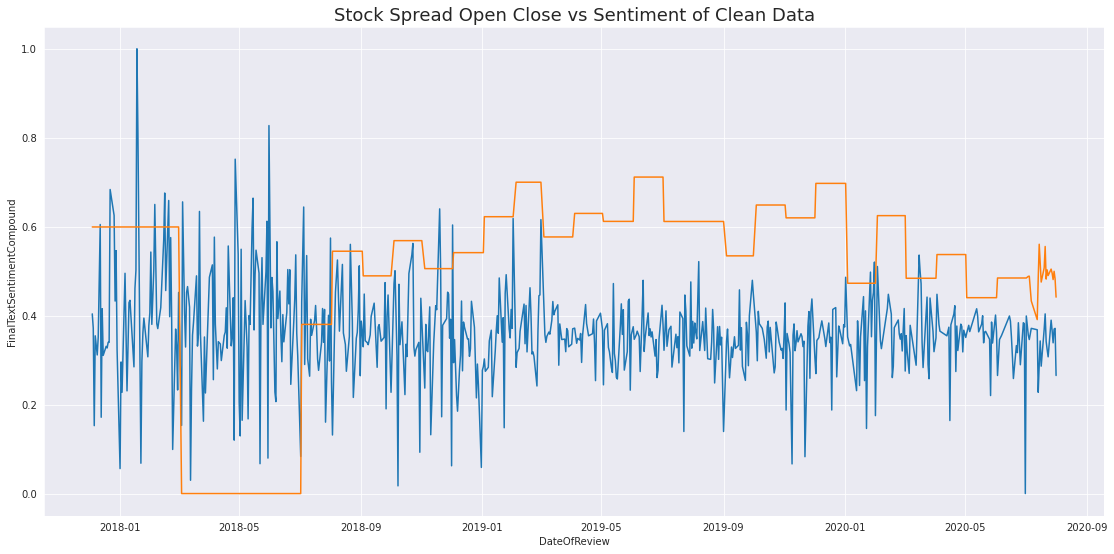

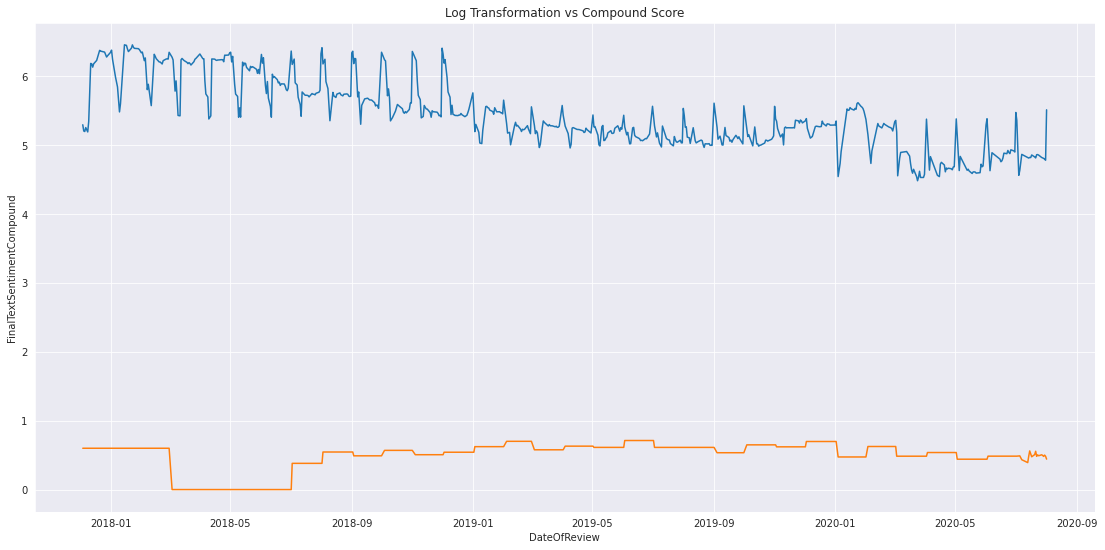

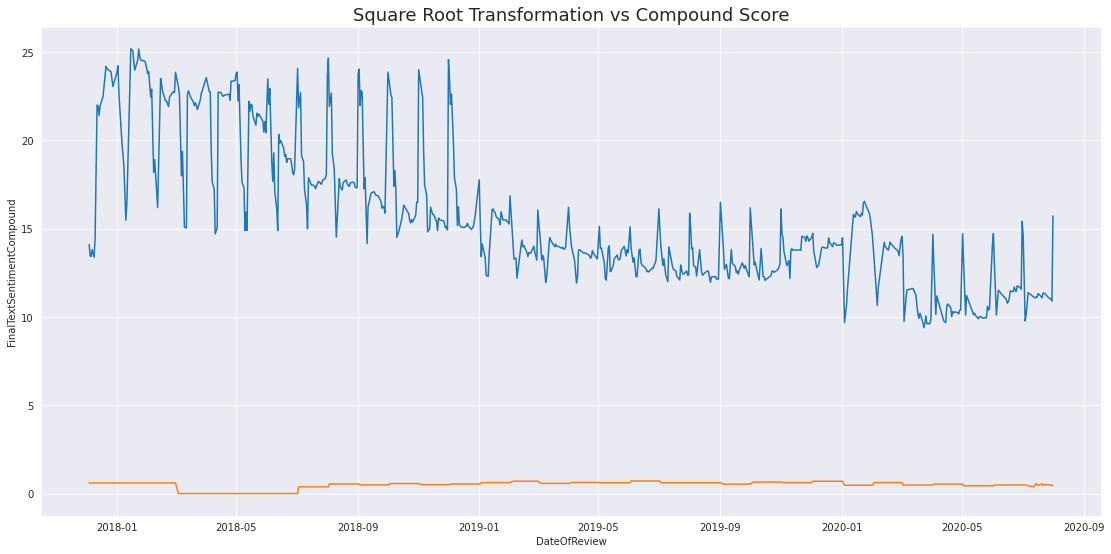

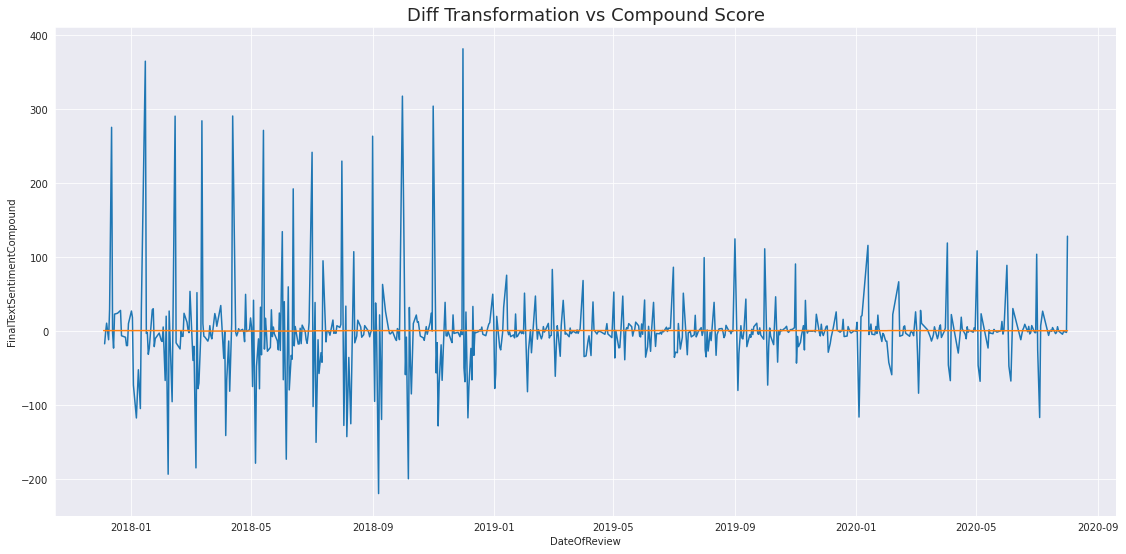

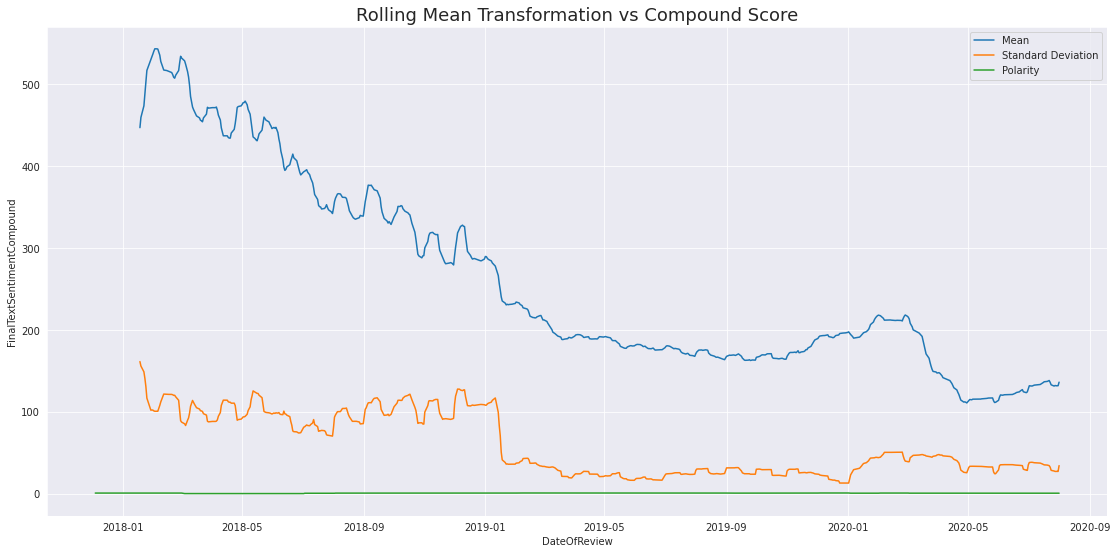

In [80]:
stock = StockAndTextEDA(bseDataAndAllReview)

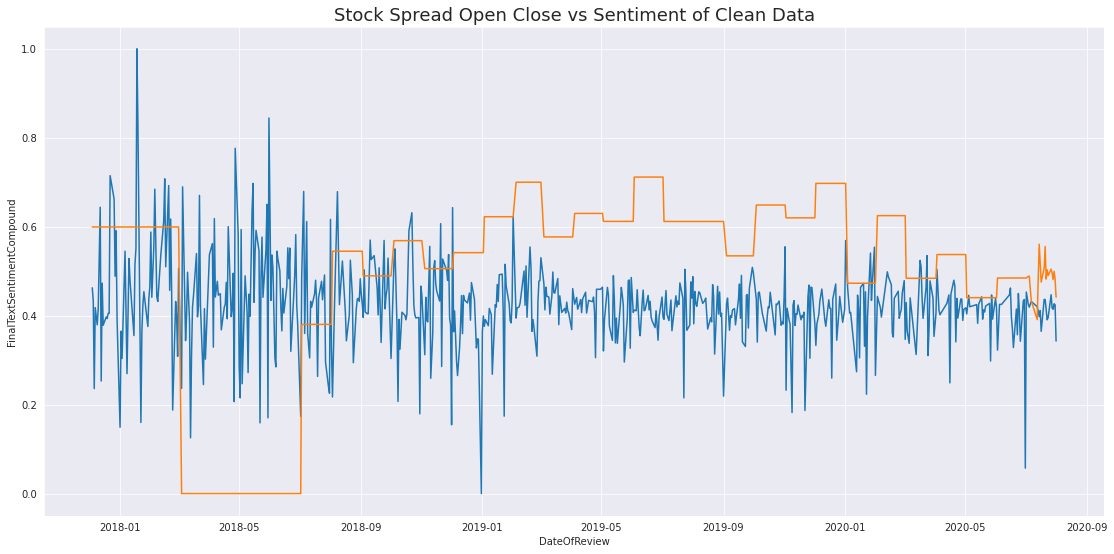

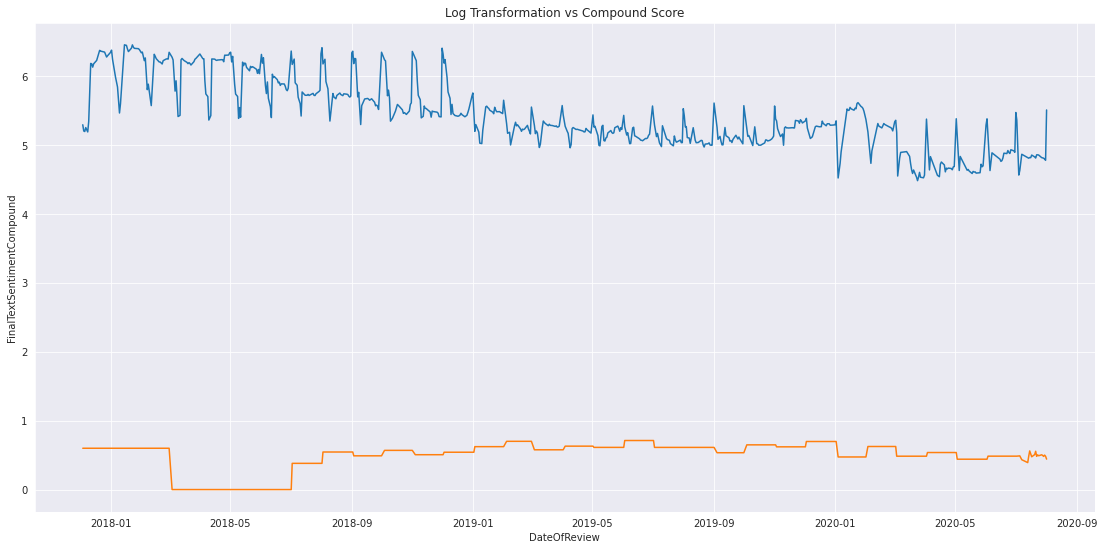

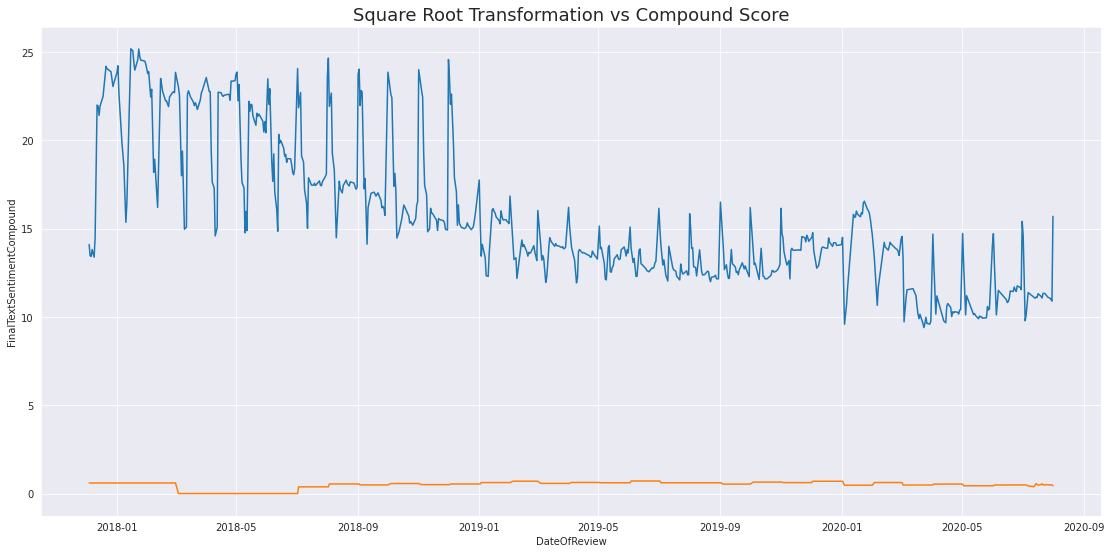

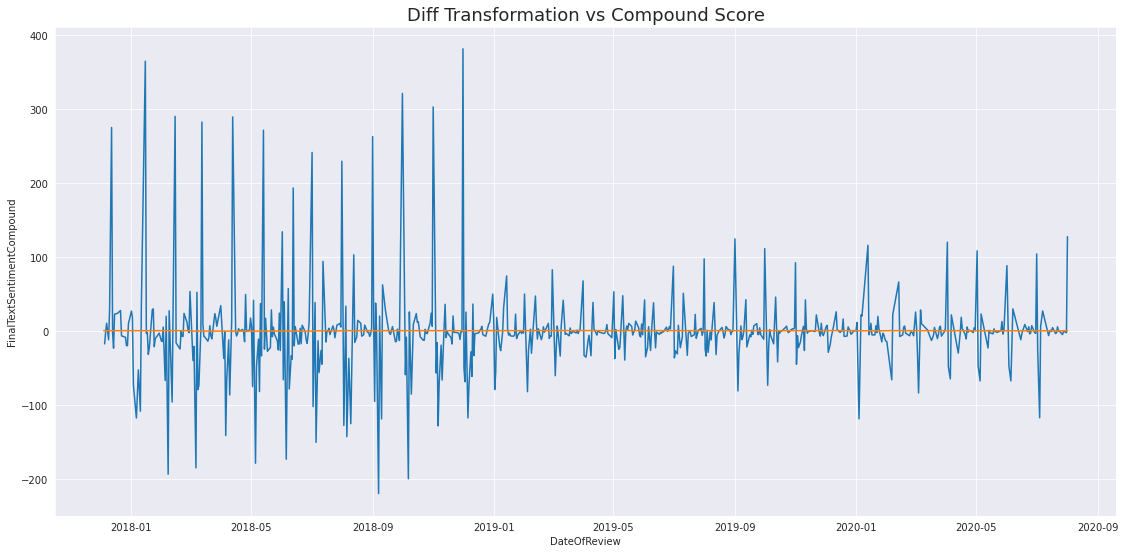

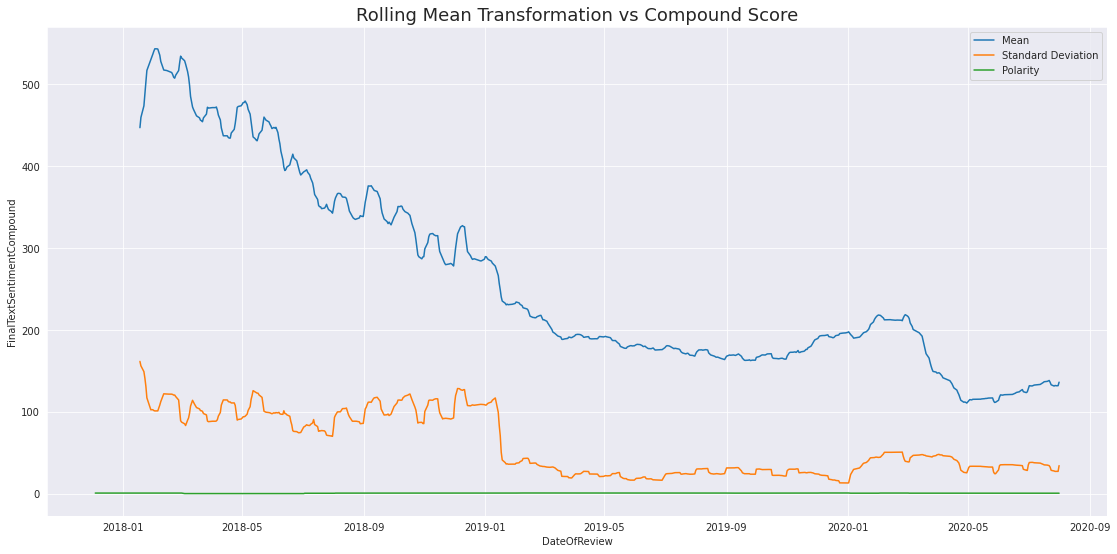

In [81]:
stock = StockAndTextEDA(nseDataAndAllReview)